In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'imagenetmini-1000:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F547506%2F998277%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240928%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240928T101620Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D420eac84502137a1f76e829f6cd749acfc03902aaeac19c5f3685781b38770824587c525e50f4458aae55246711afd4e74a9bcd310b20e8f4707a6af12fb7ebd6f6ff322ed35a4698fd312150af750695fddfe1237122935ddf29d8fe7139d0a1438d5648692059f8e385b9162c12de64fbf1e6cd635c8442209b1307ebf9238d6b7a7ee42382d97d7d071d372d77f6a946a585ae5da7278fbbe9cca238991b8dd0c5b87a9f75228f72035fc1b1a2f2aa880d89844211d0d6e84033563f23aedffb3def0d277eed8c3d100e35c2215f015df12ebec5c9f36f1c7a65296b1192020ceca4779cf2003f3d3df99cb0631d5e5a94dc4c11199fa00c7ae30f1e7d4e4'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join("/content/dataset")
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 4211443423 bytes downloaded
Downloaded and uncompressed: imagenetmini-1000
Data source import complete.


In [ ]:
!pip install numpy pillow matplotlib tensorflow scikit-learn annoy tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 14.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for annoy: filename=annoy-1.17.3-cp310-cp310-linux_x86_64.whl size=552447 sha256=f477604c082434b1f148cd9fa2e8c83321a75eca243e44bb16e2597910c1ef31
  Stored in directory: /root/.cache/pip/wheels/64/8a/da/f714bcf46c5efdcfcac0559e63370c21abe961c48e3992465a
Successfully built annoy


In [ ]:
import os
import shutil
import pandas as pd

In [ ]:
base_dir = '/content/dataset/imagenet-mini'  # Adjust this path

train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

images_dir = os.path.join(base_dir, 'images')

os.makedirs(images_dir, exist_ok=True)


In [ ]:
train_data = []
val_data = []

In [ ]:
for category in os.listdir(train_dir):
    category_path = os.path.join(train_dir, category)
    if os.path.isdir(category_path):
        for img_name in os.listdir(category_path):
            img_src_path = os.path.join(category_path, img_name)
            img_dst_name = f"{category}_{img_name}"
            img_dst_path = os.path.join(images_dir, img_dst_name)
            shutil.move(img_src_path, img_dst_path)
            train_data.append({'filename': img_dst_name, 'label': category})

In [ ]:
for category in os.listdir(val_dir):
    category_path = os.path.join(val_dir, category)
    if os.path.isdir(category_path):
        for img_name in os.listdir(category_path):
            img_src_path = os.path.join(category_path, img_name)
            img_dst_name = f"{category}_{img_name}"  # To avoid filename conflicts
            img_dst_path = os.path.join(images_dir, img_dst_name)
            shutil.move(img_src_path, img_dst_path)
            val_data.append({'filename': img_dst_name, 'label': category})

In [ ]:
train_df = pd.DataFrame(train_data)
val_df = pd.DataFrame(val_data)

train_csv_path = os.path.join(base_dir, 'train.csv')
val_csv_path = os.path.join(base_dir, 'val.csv')

train_df.to_csv(train_csv_path, index=False)
val_df.to_csv(val_csv_path, index=False)

In [ ]:
test_csv_path = os.path.join(base_dir, 'test.csv')

In [ ]:
combined_df = pd.concat([train_df, val_df], ignore_index=True)

In [ ]:
test_size = 0.1  # 10% of the data

combined_df = combined_df.sample(frac=1, random_state=42).reset_index(drop=True)

num_test_samples = int(test_size * len(combined_df))

test_df = combined_df.iloc[:num_test_samples]
remaining_df = combined_df.iloc[num_test_samples:]

In [ ]:
val_proportion = len(val_df) / (len(train_df) + len(val_df))

num_val_samples = int(val_proportion * len(remaining_df))

val_df_new = remaining_df.iloc[:num_val_samples]
train_df_new = remaining_df.iloc[num_val_samples:]

In [ ]:
train_df_new.to_csv(train_csv_path, index=False)

val_df_new.to_csv(val_csv_path, index=False)

test_df.to_csv(test_csv_path, index=False)

In [ ]:
import os
import pandas as pd

base_dir = '/content/dataset/imagenet-mini'

image_dir = os.path.join(base_dir, 'images')

train_csv = pd.read_csv(os.path.join(base_dir, 'train.csv'))
val_csv = pd.read_csv(os.path.join(base_dir, 'val.csv'))
test_csv = pd.read_csv(os.path.join(base_dir, 'test.csv'))

all_data = pd.concat([train_csv, val_csv, test_csv], ignore_index=True)

image_files = [os.path.join(image_dir, fname) for fname in all_data['filename']]

In [ ]:
import numpy as np
from PIL import Image
from tqdm import tqdm

In [ ]:
def preprocess_image(image_path, target_size=(224, 224)):
    img = Image.open(image_path).convert('RGB')
    img = img.resize(target_size, Image.LANCZOS)
    img_array = np.array(img)
    img_array = img_array / 255.0
    return img_array

In [ ]:
def image_batch_generator(image_files, batch_size, preprocess_function):
    num_images = len(image_files)
    for offset in range(0, num_images, batch_size):
        batch_files = image_files[offset:offset+batch_size]
        batch_images = [preprocess_function(img_path) for img_path in batch_files]
        yield np.array(batch_images)

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2

base_model = MobileNetV2(weights='imagenet', include_top=False, pooling='avg')

<ipython-input-18-6cdc49434d4a>:5: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, pooling='avg')


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
batch_size = 32
feature_vectors = []
num_images = len(image_files)

for batch_images in tqdm(image_batch_generator(image_files, batch_size, preprocess_image), total=num_images // batch_size):
    features = base_model.predict(batch_images)
    feature_vectors.extend(features)

feature_vectors = np.array(feature_vectors)

  0%|          | 0/1208 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


  0%|          | 1/1208 [00:05<1:54:19,  5.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  0%|          | 2/1208 [00:08<1:25:35,  4.26s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  0%|          | 3/1208 [00:10<1:04:48,  3.23s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  0%|          | 4/1208 [00:13<56:27,  2.81s/it]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  0%|          | 5/1208 [00:15<50:19,  2.51s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  0%|          | 6/1208 [00:17<50:01,  2.50s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  1%|          | 7/1208 [00:20<54:30,  2.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  1%|          | 8/1208 [00:22<50:07,  2.51s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  1%|          | 9/1208 [00:24<46:59,  2.35s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  1%|          | 10/1208 [00:26<44:28,  2.23s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  1%|          | 11/1208 [00:28<42:42,  2.14s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  1%|          | 12/1208 [00:30<41:27,  2.08s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


  1%|          | 13/1208 [00:34<50:20,  2.53s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


  1%|          | 14/1208 [00:39<1:05:04,  3.27s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


  1%|          | 15/1208 [00:43<1:12:56,  3.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


  1%|▏         | 16/1208 [00:49<1:22:26,  4.15s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


  1%|▏         | 17/1208 [01:01<2:12:18,  6.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


  1%|▏         | 18/1208 [01:07<2:10:45,  6.59s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  2%|▏         | 19/1208 [01:11<1:50:51,  5.59s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  2%|▏         | 20/1208 [01:14<1:36:39,  4.88s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  2%|▏         | 21/1208 [01:16<1:19:40,  4.03s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  2%|▏         | 22/1208 [01:19<1:13:38,  3.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  2%|▏         | 23/1208 [01:22<1:06:36,  3.37s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


  2%|▏         | 24/1208 [01:25<1:07:09,  3.40s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


  2%|▏         | 25/1208 [01:29<1:10:23,  3.57s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


  2%|▏         | 26/1208 [01:34<1:18:58,  4.01s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


  2%|▏         | 27/1208 [01:40<1:29:50,  4.56s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  2%|▏         | 28/1208 [01:43<1:20:19,  4.08s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  2%|▏         | 29/1208 [01:45<1:08:17,  3.48s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  2%|▏         | 30/1208 [01:47<59:47,  3.05s/it]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  3%|▎         | 31/1208 [01:50<59:45,  3.05s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  3%|▎         | 32/1208 [01:53<1:00:54,  3.11s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  3%|▎         | 33/1208 [01:56<1:00:07,  3.07s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  3%|▎         | 34/1208 [01:58<53:59,  2.76s/it]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  3%|▎         | 35/1208 [02:01<55:36,  2.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  3%|▎         | 36/1208 [02:04<51:53,  2.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  3%|▎         | 37/1208 [02:07<55:37,  2.85s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  3%|▎         | 38/1208 [02:09<51:20,  2.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  3%|▎         | 39/1208 [02:11<48:08,  2.47s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  3%|▎         | 40/1208 [02:13<45:20,  2.33s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  3%|▎         | 41/1208 [02:15<43:43,  2.25s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  3%|▎         | 42/1208 [02:17<42:10,  2.17s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


  4%|▎         | 43/1208 [02:20<49:11,  2.53s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  4%|▎         | 44/1208 [02:24<52:51,  2.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  4%|▎         | 45/1208 [02:26<48:43,  2.51s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  4%|▍         | 46/1208 [02:28<46:12,  2.39s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  4%|▍         | 47/1208 [02:30<43:55,  2.27s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  4%|▍         | 48/1208 [02:32<43:29,  2.25s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


  4%|▍         | 49/1208 [02:35<50:34,  2.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  4%|▍         | 50/1208 [02:38<47:56,  2.48s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  4%|▍         | 51/1208 [02:40<45:26,  2.36s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  4%|▍         | 52/1208 [02:42<44:58,  2.33s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  4%|▍         | 53/1208 [02:44<43:44,  2.27s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  4%|▍         | 54/1208 [02:47<49:25,  2.57s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


  5%|▍         | 55/1208 [02:51<57:01,  2.97s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


  5%|▍         | 56/1208 [02:56<1:04:55,  3.38s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  5%|▍         | 57/1208 [02:59<1:03:43,  3.32s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  5%|▍         | 58/1208 [03:02<1:00:44,  3.17s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


  5%|▍         | 59/1208 [03:07<1:14:52,  3.91s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


  5%|▍         | 60/1208 [03:11<1:16:18,  3.99s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  5%|▌         | 61/1208 [03:14<1:06:52,  3.50s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  5%|▌         | 62/1208 [03:16<58:42,  3.07s/it]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  5%|▌         | 63/1208 [03:18<54:58,  2.88s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  5%|▌         | 64/1208 [03:21<55:59,  2.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  5%|▌         | 65/1208 [03:24<51:58,  2.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  5%|▌         | 66/1208 [03:26<50:57,  2.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  6%|▌         | 67/1208 [03:30<55:51,  2.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


  6%|▌         | 68/1208 [03:34<1:01:26,  3.23s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


  6%|▌         | 69/1208 [03:38<1:05:08,  3.43s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  6%|▌         | 70/1208 [03:39<55:15,  2.91s/it]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  6%|▌         | 71/1208 [03:42<55:19,  2.92s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  6%|▌         | 72/1208 [03:44<51:03,  2.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  6%|▌         | 73/1208 [03:47<50:01,  2.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


  6%|▌         | 74/1208 [03:50<52:18,  2.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  6%|▌         | 75/1208 [03:53<51:25,  2.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  6%|▋         | 76/1208 [03:55<49:11,  2.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  6%|▋         | 77/1208 [03:56<43:20,  2.30s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  6%|▋         | 78/1208 [03:58<39:23,  2.09s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  7%|▋         | 79/1208 [04:00<36:27,  1.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  7%|▋         | 80/1208 [04:02<36:17,  1.93s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  7%|▋         | 81/1208 [04:04<40:23,  2.15s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  7%|▋         | 82/1208 [04:06<37:55,  2.02s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  7%|▋         | 83/1208 [04:08<35:45,  1.91s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  7%|▋         | 84/1208 [04:09<34:07,  1.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  7%|▋         | 85/1208 [04:11<32:55,  1.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  7%|▋         | 86/1208 [04:12<32:17,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  7%|▋         | 87/1208 [04:14<31:44,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  7%|▋         | 88/1208 [04:16<35:05,  1.88s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  7%|▋         | 89/1208 [04:19<38:05,  2.04s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  7%|▋         | 90/1208 [04:20<35:39,  1.91s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


  8%|▊         | 91/1208 [04:23<41:27,  2.23s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  8%|▊         | 92/1208 [04:27<50:11,  2.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  8%|▊         | 93/1208 [04:30<49:33,  2.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  8%|▊         | 94/1208 [04:33<53:16,  2.87s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  8%|▊         | 95/1208 [04:35<46:18,  2.50s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  8%|▊         | 96/1208 [04:37<44:08,  2.38s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  8%|▊         | 97/1208 [04:38<39:44,  2.15s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  8%|▊         | 98/1208 [04:40<37:06,  2.01s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  8%|▊         | 99/1208 [04:42<35:20,  1.91s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


  8%|▊         | 100/1208 [04:46<46:56,  2.54s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


  8%|▊         | 101/1208 [04:52<1:04:19,  3.49s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  8%|▊         | 102/1208 [04:55<1:03:00,  3.42s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  9%|▊         | 103/1208 [04:57<57:37,  3.13s/it]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  9%|▊         | 104/1208 [05:00<54:51,  2.98s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  9%|▊         | 105/1208 [05:02<48:00,  2.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  9%|▉         | 106/1208 [05:03<42:20,  2.31s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  9%|▉         | 107/1208 [05:05<38:27,  2.10s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  9%|▉         | 108/1208 [05:06<35:54,  1.96s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  9%|▉         | 109/1208 [05:08<33:40,  1.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  9%|▉         | 110/1208 [05:10<32:11,  1.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  9%|▉         | 111/1208 [05:12<34:12,  1.87s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  9%|▉         | 112/1208 [05:14<38:05,  2.09s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  9%|▉         | 113/1208 [05:16<35:21,  1.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  9%|▉         | 114/1208 [05:17<33:17,  1.83s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 10%|▉         | 115/1208 [05:19<32:30,  1.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 10%|▉         | 116/1208 [05:21<31:32,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 10%|▉         | 117/1208 [05:22<31:14,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 10%|▉         | 118/1208 [05:24<30:42,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 10%|▉         | 119/1208 [05:27<35:16,  1.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 10%|▉         | 120/1208 [05:29<35:15,  1.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 10%|█         | 121/1208 [05:30<33:08,  1.83s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 10%|█         | 122/1208 [05:32<31:29,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 10%|█         | 123/1208 [05:33<30:55,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 10%|█         | 124/1208 [05:35<30:01,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 10%|█         | 125/1208 [05:36<29:38,  1.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 10%|█         | 126/1208 [05:38<31:53,  1.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 11%|█         | 127/1208 [05:41<36:11,  2.01s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 11%|█         | 128/1208 [05:43<34:26,  1.91s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 11%|█         | 129/1208 [05:44<32:25,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 11%|█         | 130/1208 [05:46<31:10,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 11%|█         | 131/1208 [05:48<30:39,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 11%|█         | 132/1208 [05:49<30:13,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 11%|█         | 133/1208 [05:51<29:50,  1.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 11%|█         | 134/1208 [05:53<33:46,  1.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 11%|█         | 135/1208 [05:56<36:34,  2.05s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 11%|█▏        | 136/1208 [05:57<34:20,  1.92s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 11%|█▏        | 137/1208 [05:59<32:47,  1.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 11%|█▏        | 138/1208 [06:00<31:27,  1.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 12%|█▏        | 139/1208 [06:02<30:39,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 12%|█▏        | 140/1208 [06:04<29:46,  1.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 12%|█▏        | 141/1208 [06:05<29:11,  1.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


 12%|█▏        | 142/1208 [06:09<38:30,  2.17s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 12%|█▏        | 143/1208 [06:10<35:55,  2.02s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 12%|█▏        | 144/1208 [06:12<33:32,  1.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 12%|█▏        | 145/1208 [06:14<32:10,  1.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 12%|█▏        | 146/1208 [06:15<30:53,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 12%|█▏        | 147/1208 [06:17<30:10,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 12%|█▏        | 148/1208 [06:18<29:36,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 12%|█▏        | 149/1208 [06:21<32:53,  1.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 12%|█▏        | 150/1208 [06:23<36:47,  2.09s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 12%|█▎        | 151/1208 [06:25<33:43,  1.91s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 13%|█▎        | 152/1208 [06:26<31:45,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 13%|█▎        | 153/1208 [06:29<37:36,  2.14s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 13%|█▎        | 154/1208 [06:32<42:07,  2.40s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


 13%|█▎        | 155/1208 [06:35<46:03,  2.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 13%|█▎        | 156/1208 [06:38<44:59,  2.57s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 13%|█▎        | 157/1208 [06:39<39:53,  2.28s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 13%|█▎        | 158/1208 [06:41<37:33,  2.15s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 13%|█▎        | 159/1208 [06:43<36:27,  2.08s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 13%|█▎        | 160/1208 [06:45<33:52,  1.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 13%|█▎        | 161/1208 [06:48<39:32,  2.27s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 13%|█▎        | 162/1208 [06:51<42:22,  2.43s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 13%|█▎        | 163/1208 [06:52<38:25,  2.21s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 14%|█▎        | 164/1208 [06:54<35:09,  2.02s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 14%|█▎        | 165/1208 [06:56<33:14,  1.91s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 14%|█▎        | 166/1208 [06:57<31:59,  1.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 14%|█▍        | 167/1208 [06:59<31:08,  1.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 14%|█▍        | 168/1208 [07:01<30:16,  1.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 14%|█▍        | 169/1208 [07:03<34:37,  2.00s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 14%|█▍        | 170/1208 [07:05<34:26,  1.99s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 14%|█▍        | 171/1208 [07:07<32:14,  1.87s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 14%|█▍        | 172/1208 [07:08<30:57,  1.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 14%|█▍        | 173/1208 [07:10<29:50,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 14%|█▍        | 174/1208 [07:12<29:34,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 14%|█▍        | 175/1208 [07:13<29:02,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 15%|█▍        | 176/1208 [07:15<31:00,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 15%|█▍        | 177/1208 [07:18<35:19,  2.06s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 15%|█▍        | 178/1208 [07:20<33:41,  1.96s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 15%|█▍        | 179/1208 [07:21<32:16,  1.88s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 15%|█▍        | 180/1208 [07:23<31:01,  1.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 15%|█▍        | 181/1208 [07:25<29:54,  1.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 15%|█▌        | 182/1208 [07:26<29:10,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 15%|█▌        | 183/1208 [07:28<28:32,  1.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 15%|█▌        | 184/1208 [07:30<32:56,  1.93s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 15%|█▌        | 185/1208 [07:33<34:12,  2.01s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 15%|█▌        | 186/1208 [07:34<31:55,  1.87s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 15%|█▌        | 187/1208 [07:36<30:51,  1.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 16%|█▌        | 188/1208 [07:37<30:09,  1.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 16%|█▌        | 189/1208 [07:39<29:21,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 16%|█▌        | 190/1208 [07:41<28:21,  1.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 16%|█▌        | 191/1208 [07:43<30:19,  1.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 16%|█▌        | 192/1208 [07:46<37:18,  2.20s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 16%|█▌        | 193/1208 [07:47<34:33,  2.04s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 16%|█▌        | 194/1208 [07:49<32:10,  1.90s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 16%|█▌        | 195/1208 [07:51<30:54,  1.83s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 16%|█▌        | 196/1208 [07:52<29:57,  1.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 16%|█▋        | 197/1208 [07:54<31:35,  1.87s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 16%|█▋        | 198/1208 [07:57<32:25,  1.93s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 16%|█▋        | 199/1208 [07:59<35:35,  2.12s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 17%|█▋        | 200/1208 [08:01<33:24,  1.99s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 17%|█▋        | 201/1208 [08:02<31:23,  1.87s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 17%|█▋        | 202/1208 [08:04<29:58,  1.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 17%|█▋        | 203/1208 [08:06<28:51,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 17%|█▋        | 204/1208 [08:07<27:56,  1.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 17%|█▋        | 205/1208 [08:09<27:26,  1.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 17%|█▋        | 206/1208 [08:11<30:18,  1.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 17%|█▋        | 207/1208 [08:13<33:45,  2.02s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 17%|█▋        | 208/1208 [08:15<31:51,  1.91s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 17%|█▋        | 209/1208 [08:17<30:19,  1.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 17%|█▋        | 210/1208 [08:18<29:16,  1.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 17%|█▋        | 211/1208 [08:20<29:34,  1.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 18%|█▊        | 212/1208 [08:22<28:45,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 18%|█▊        | 213/1208 [08:23<28:32,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 18%|█▊        | 214/1208 [08:26<33:38,  2.03s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 18%|█▊        | 215/1208 [08:28<32:35,  1.97s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 18%|█▊        | 216/1208 [08:30<30:41,  1.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 18%|█▊        | 217/1208 [08:31<29:20,  1.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 18%|█▊        | 218/1208 [08:33<28:10,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 18%|█▊        | 219/1208 [08:34<28:15,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 18%|█▊        | 220/1208 [08:36<28:01,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 18%|█▊        | 221/1208 [08:38<31:14,  1.90s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 18%|█▊        | 222/1208 [08:41<33:24,  2.03s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 18%|█▊        | 223/1208 [08:42<31:10,  1.90s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 19%|█▊        | 224/1208 [08:44<29:25,  1.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 19%|█▊        | 225/1208 [08:46<29:27,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 19%|█▊        | 226/1208 [08:47<28:22,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 19%|█▉        | 227/1208 [08:49<27:41,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 19%|█▉        | 228/1208 [08:51<27:36,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 19%|█▉        | 229/1208 [08:53<32:09,  1.97s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 19%|█▉        | 230/1208 [08:55<31:07,  1.91s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 19%|█▉        | 231/1208 [08:57<29:36,  1.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 19%|█▉        | 232/1208 [08:58<28:44,  1.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 19%|█▉        | 233/1208 [09:00<28:39,  1.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 19%|█▉        | 234/1208 [09:02<27:28,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 19%|█▉        | 235/1208 [09:03<26:57,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 20%|█▉        | 236/1208 [09:05<29:18,  1.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 20%|█▉        | 237/1208 [09:08<32:39,  2.02s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 20%|█▉        | 238/1208 [09:09<30:22,  1.88s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 20%|█▉        | 239/1208 [09:11<29:08,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 20%|█▉        | 240/1208 [09:13<28:01,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 20%|█▉        | 241/1208 [09:14<27:15,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 20%|██        | 242/1208 [09:16<26:59,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 20%|██        | 243/1208 [09:17<26:44,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 20%|██        | 244/1208 [09:20<30:20,  1.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 20%|██        | 245/1208 [09:22<31:47,  1.98s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 20%|██        | 246/1208 [09:24<30:02,  1.87s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 20%|██        | 247/1208 [09:25<29:07,  1.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 21%|██        | 248/1208 [09:27<28:59,  1.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 21%|██        | 249/1208 [09:29<28:05,  1.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 21%|██        | 250/1208 [09:30<26:57,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 21%|██        | 251/1208 [09:32<28:31,  1.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 21%|██        | 252/1208 [09:35<33:07,  2.08s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 21%|██        | 253/1208 [09:37<30:50,  1.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 21%|██        | 254/1208 [09:38<28:53,  1.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 21%|██        | 255/1208 [09:40<27:41,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 21%|██        | 256/1208 [09:41<27:02,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 21%|██▏       | 257/1208 [09:43<26:23,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 21%|██▏       | 258/1208 [09:45<25:55,  1.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 21%|██▏       | 259/1208 [09:47<28:46,  1.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 22%|██▏       | 260/1208 [09:49<31:51,  2.02s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 22%|██▏       | 261/1208 [09:51<29:45,  1.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 22%|██▏       | 262/1208 [09:52<28:09,  1.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 22%|██▏       | 263/1208 [09:54<27:06,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 22%|██▏       | 264/1208 [09:56<26:37,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 22%|██▏       | 265/1208 [09:57<25:59,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 22%|██▏       | 266/1208 [09:59<25:27,  1.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 22%|██▏       | 267/1208 [10:01<29:42,  1.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 22%|██▏       | 268/1208 [10:03<31:07,  1.99s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 22%|██▏       | 269/1208 [10:05<29:21,  1.88s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 22%|██▏       | 270/1208 [10:07<28:03,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 22%|██▏       | 271/1208 [10:08<27:09,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 23%|██▎       | 272/1208 [10:10<26:13,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 23%|██▎       | 273/1208 [10:11<25:53,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 23%|██▎       | 274/1208 [10:13<25:34,  1.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 23%|██▎       | 275/1208 [10:16<30:18,  1.95s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 23%|██▎       | 276/1208 [10:17<29:31,  1.90s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 23%|██▎       | 277/1208 [10:19<27:57,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 23%|██▎       | 278/1208 [10:21<26:54,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 23%|██▎       | 279/1208 [10:22<26:02,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 23%|██▎       | 280/1208 [10:24<25:57,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 23%|██▎       | 281/1208 [10:25<25:29,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 23%|██▎       | 282/1208 [10:28<28:00,  1.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 23%|██▎       | 283/1208 [10:30<31:00,  2.01s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 24%|██▎       | 284/1208 [10:32<29:00,  1.88s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 24%|██▎       | 285/1208 [10:33<27:47,  1.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 24%|██▎       | 286/1208 [10:35<26:42,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 24%|██▍       | 287/1208 [10:37<26:35,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 24%|██▍       | 288/1208 [10:38<25:57,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 24%|██▍       | 289/1208 [10:40<25:18,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 24%|██▍       | 290/1208 [10:42<29:41,  1.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 24%|██▍       | 291/1208 [10:44<28:53,  1.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 24%|██▍       | 292/1208 [10:46<27:26,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 24%|██▍       | 293/1208 [10:47<26:25,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 24%|██▍       | 294/1208 [10:49<26:03,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 24%|██▍       | 295/1208 [10:51<25:27,  1.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 25%|██▍       | 296/1208 [10:52<25:20,  1.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 25%|██▍       | 297/1208 [10:54<27:17,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 25%|██▍       | 298/1208 [10:57<33:18,  2.20s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 25%|██▍       | 299/1208 [10:59<30:16,  2.00s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 25%|██▍       | 300/1208 [11:01<28:20,  1.87s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


 25%|██▍       | 301/1208 [11:06<44:49,  2.97s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


 25%|██▌       | 302/1208 [11:09<46:19,  3.07s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 25%|██▌       | 303/1208 [11:12<43:05,  2.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 25%|██▌       | 304/1208 [11:13<37:37,  2.50s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 25%|██▌       | 305/1208 [11:15<33:58,  2.26s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 25%|██▌       | 306/1208 [11:17<31:05,  2.07s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 25%|██▌       | 307/1208 [11:20<35:05,  2.34s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 25%|██▌       | 308/1208 [11:23<38:09,  2.54s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 26%|██▌       | 309/1208 [11:26<41:07,  2.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 26%|██▌       | 310/1208 [11:28<36:04,  2.41s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 26%|██▌       | 311/1208 [11:29<32:28,  2.17s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 26%|██▌       | 312/1208 [11:31<30:11,  2.02s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 26%|██▌       | 313/1208 [11:33<28:23,  1.90s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 26%|██▌       | 314/1208 [11:34<28:02,  1.88s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 26%|██▌       | 315/1208 [11:37<32:10,  2.16s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 26%|██▌       | 316/1208 [11:39<30:48,  2.07s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 26%|██▌       | 317/1208 [11:41<28:39,  1.93s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 26%|██▋       | 318/1208 [11:42<27:24,  1.85s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 26%|██▋       | 319/1208 [11:44<26:57,  1.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 26%|██▋       | 320/1208 [11:46<26:12,  1.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 27%|██▋       | 321/1208 [11:47<25:38,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 27%|██▋       | 322/1208 [11:50<29:03,  1.97s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 27%|██▋       | 323/1208 [11:52<29:52,  2.03s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 27%|██▋       | 324/1208 [11:54<28:04,  1.91s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 27%|██▋       | 325/1208 [11:55<26:49,  1.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 27%|██▋       | 326/1208 [11:57<25:50,  1.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 27%|██▋       | 327/1208 [11:58<24:59,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 27%|██▋       | 328/1208 [12:00<24:50,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 27%|██▋       | 329/1208 [12:02<26:20,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 27%|██▋       | 330/1208 [12:05<30:05,  2.06s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 27%|██▋       | 331/1208 [12:07<28:34,  1.96s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 27%|██▋       | 332/1208 [12:08<26:55,  1.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 28%|██▊       | 333/1208 [12:10<25:59,  1.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 28%|██▊       | 334/1208 [12:11<25:15,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 28%|██▊       | 335/1208 [12:13<24:44,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 28%|██▊       | 336/1208 [12:15<25:23,  1.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 28%|██▊       | 337/1208 [12:18<30:55,  2.13s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 28%|██▊       | 338/1208 [12:20<28:42,  1.98s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 28%|██▊       | 339/1208 [12:21<27:14,  1.88s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 28%|██▊       | 340/1208 [12:23<25:52,  1.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 28%|██▊       | 341/1208 [12:24<25:30,  1.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 28%|██▊       | 342/1208 [12:26<24:49,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 28%|██▊       | 343/1208 [12:28<24:25,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 28%|██▊       | 344/1208 [12:30<27:27,  1.91s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 29%|██▊       | 345/1208 [12:32<29:20,  2.04s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 29%|██▊       | 346/1208 [12:34<27:20,  1.90s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 29%|██▊       | 347/1208 [12:36<27:52,  1.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 29%|██▉       | 348/1208 [12:38<26:30,  1.85s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 29%|██▉       | 349/1208 [12:39<25:35,  1.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 29%|██▉       | 350/1208 [12:41<25:21,  1.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 29%|██▉       | 351/1208 [12:43<26:27,  1.85s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 29%|██▉       | 352/1208 [12:46<30:01,  2.10s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 29%|██▉       | 353/1208 [12:47<27:55,  1.96s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 29%|██▉       | 354/1208 [12:49<26:38,  1.87s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 29%|██▉       | 355/1208 [12:51<25:49,  1.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 29%|██▉       | 356/1208 [12:52<24:45,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 30%|██▉       | 357/1208 [12:54<24:25,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 30%|██▉       | 358/1208 [12:56<23:57,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 30%|██▉       | 359/1208 [12:59<29:25,  2.08s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 30%|██▉       | 360/1208 [13:00<27:47,  1.97s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 30%|██▉       | 361/1208 [13:02<26:11,  1.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 30%|██▉       | 362/1208 [13:04<25:27,  1.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 30%|███       | 363/1208 [13:05<24:28,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 30%|███       | 364/1208 [13:07<24:12,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 30%|███       | 365/1208 [13:09<23:53,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 30%|███       | 366/1208 [13:11<27:05,  1.93s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 30%|███       | 367/1208 [13:13<28:25,  2.03s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 30%|███       | 368/1208 [13:15<26:38,  1.90s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 31%|███       | 369/1208 [13:16<25:25,  1.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 31%|███       | 370/1208 [13:18<24:39,  1.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 31%|███       | 371/1208 [13:20<24:11,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 31%|███       | 372/1208 [13:21<23:50,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 31%|███       | 373/1208 [13:24<26:15,  1.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 31%|███       | 374/1208 [13:26<29:23,  2.11s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 31%|███       | 375/1208 [13:28<27:30,  1.98s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 31%|███       | 376/1208 [13:30<25:43,  1.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 31%|███       | 377/1208 [13:31<24:50,  1.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 31%|███▏      | 378/1208 [13:33<23:59,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 31%|███▏      | 379/1208 [13:35<23:43,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 31%|███▏      | 380/1208 [13:36<23:05,  1.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 32%|███▏      | 381/1208 [13:39<26:01,  1.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 32%|███▏      | 382/1208 [13:41<27:52,  2.02s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 32%|███▏      | 383/1208 [13:42<26:00,  1.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 32%|███▏      | 384/1208 [13:44<24:45,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 32%|███▏      | 385/1208 [13:46<23:52,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 32%|███▏      | 386/1208 [13:47<23:14,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 32%|███▏      | 387/1208 [13:49<22:36,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 32%|███▏      | 388/1208 [13:50<22:24,  1.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 32%|███▏      | 389/1208 [13:53<26:26,  1.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 32%|███▏      | 390/1208 [13:55<26:08,  1.92s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 32%|███▏      | 391/1208 [13:57<25:07,  1.85s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 32%|███▏      | 392/1208 [13:58<24:13,  1.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 33%|███▎      | 393/1208 [14:00<23:17,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 33%|███▎      | 394/1208 [14:01<22:49,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 33%|███▎      | 395/1208 [14:03<22:48,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 33%|███▎      | 396/1208 [14:05<25:01,  1.85s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 33%|███▎      | 397/1208 [14:08<27:29,  2.03s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 33%|███▎      | 398/1208 [14:09<25:45,  1.91s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 33%|███▎      | 399/1208 [14:11<24:29,  1.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 33%|███▎      | 400/1208 [14:13<23:28,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 33%|███▎      | 401/1208 [14:14<22:45,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 33%|███▎      | 402/1208 [14:16<22:28,  1.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 33%|███▎      | 403/1208 [14:17<22:02,  1.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 33%|███▎      | 404/1208 [14:20<25:16,  1.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 34%|███▎      | 405/1208 [14:22<27:08,  2.03s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 34%|███▎      | 406/1208 [14:24<25:23,  1.90s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 34%|███▎      | 407/1208 [14:25<24:28,  1.83s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 34%|███▍      | 408/1208 [14:27<23:26,  1.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 34%|███▍      | 409/1208 [14:29<22:46,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 34%|███▍      | 410/1208 [14:30<22:26,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 34%|███▍      | 411/1208 [14:33<27:11,  2.05s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 34%|███▍      | 412/1208 [14:35<27:16,  2.06s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 34%|███▍      | 413/1208 [14:37<25:25,  1.92s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 34%|███▍      | 414/1208 [14:38<24:36,  1.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 34%|███▍      | 415/1208 [14:40<23:37,  1.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 34%|███▍      | 416/1208 [14:42<23:02,  1.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 35%|███▍      | 417/1208 [14:43<22:27,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 35%|███▍      | 418/1208 [14:45<23:25,  1.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 35%|███▍      | 419/1208 [14:48<26:47,  2.04s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 35%|███▍      | 420/1208 [14:50<25:40,  1.96s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 35%|███▍      | 421/1208 [14:51<24:10,  1.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 35%|███▍      | 422/1208 [14:53<23:10,  1.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 35%|███▌      | 423/1208 [14:55<22:36,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 35%|███▌      | 424/1208 [14:56<22:25,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 35%|███▌      | 425/1208 [14:58<21:53,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 35%|███▌      | 426/1208 [15:00<24:39,  1.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 35%|███▌      | 427/1208 [15:03<26:37,  2.05s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 35%|███▌      | 428/1208 [15:04<25:02,  1.93s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 36%|███▌      | 429/1208 [15:06<23:49,  1.83s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 36%|███▌      | 430/1208 [15:07<22:44,  1.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 36%|███▌      | 431/1208 [15:09<22:17,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 36%|███▌      | 432/1208 [15:11<21:50,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 36%|███▌      | 433/1208 [15:13<22:23,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 36%|███▌      | 434/1208 [15:15<25:28,  1.97s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 36%|███▌      | 435/1208 [15:17<24:34,  1.91s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 36%|███▌      | 436/1208 [15:19<24:05,  1.87s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 36%|███▌      | 437/1208 [15:20<23:03,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 36%|███▋      | 438/1208 [15:22<22:13,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 36%|███▋      | 439/1208 [15:23<21:41,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 36%|███▋      | 440/1208 [15:25<21:55,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 37%|███▋      | 441/1208 [15:28<24:50,  1.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 37%|███▋      | 442/1208 [15:30<26:03,  2.04s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 37%|███▋      | 443/1208 [15:32<24:24,  1.91s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 37%|███▋      | 444/1208 [15:33<23:16,  1.83s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 37%|███▋      | 445/1208 [15:35<22:22,  1.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 37%|███▋      | 446/1208 [15:36<21:47,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 37%|███▋      | 447/1208 [15:38<21:15,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 37%|███▋      | 448/1208 [15:40<20:50,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 37%|███▋      | 449/1208 [15:42<24:31,  1.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 37%|███▋      | 450/1208 [15:44<23:53,  1.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 37%|███▋      | 451/1208 [15:46<22:46,  1.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 37%|███▋      | 452/1208 [15:47<22:14,  1.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 38%|███▊      | 453/1208 [15:49<21:34,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 38%|███▊      | 454/1208 [15:50<20:56,  1.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 38%|███▊      | 455/1208 [15:52<20:41,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 38%|███▊      | 456/1208 [15:54<22:48,  1.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 38%|███▊      | 457/1208 [15:57<25:41,  2.05s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 38%|███▊      | 458/1208 [15:58<23:48,  1.91s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 38%|███▊      | 459/1208 [16:00<22:30,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 38%|███▊      | 460/1208 [16:02<21:37,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 38%|███▊      | 461/1208 [16:03<21:05,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 38%|███▊      | 462/1208 [16:05<20:37,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 38%|███▊      | 463/1208 [16:06<20:41,  1.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 38%|███▊      | 464/1208 [16:09<23:58,  1.93s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 38%|███▊      | 465/1208 [16:11<24:16,  1.96s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 39%|███▊      | 466/1208 [16:13<22:53,  1.85s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 39%|███▊      | 467/1208 [16:14<21:49,  1.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 39%|███▊      | 468/1208 [16:16<21:21,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 39%|███▉      | 469/1208 [16:17<20:57,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 39%|███▉      | 470/1208 [16:19<20:40,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 39%|███▉      | 471/1208 [16:21<22:06,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 39%|███▉      | 472/1208 [16:24<24:50,  2.03s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 39%|███▉      | 473/1208 [16:25<23:14,  1.90s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 39%|███▉      | 474/1208 [16:27<21:59,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 39%|███▉      | 475/1208 [16:28<21:25,  1.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 39%|███▉      | 476/1208 [16:30<20:52,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 39%|███▉      | 477/1208 [16:32<20:29,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 40%|███▉      | 478/1208 [16:33<20:22,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 40%|███▉      | 479/1208 [16:36<23:42,  1.95s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 40%|███▉      | 480/1208 [16:38<24:23,  2.01s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 40%|███▉      | 481/1208 [16:40<22:53,  1.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 40%|███▉      | 482/1208 [16:41<21:40,  1.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 40%|███▉      | 483/1208 [16:43<20:57,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 40%|████      | 484/1208 [16:44<20:24,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 40%|████      | 485/1208 [16:46<20:28,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 40%|████      | 486/1208 [16:48<22:39,  1.88s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 40%|████      | 487/1208 [16:51<25:15,  2.10s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 40%|████      | 488/1208 [16:53<23:33,  1.96s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 40%|████      | 489/1208 [16:54<22:07,  1.85s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 41%|████      | 490/1208 [16:56<21:27,  1.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 41%|████      | 491/1208 [16:58<20:37,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 41%|████      | 492/1208 [16:59<20:15,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 41%|████      | 493/1208 [17:01<20:04,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 41%|████      | 494/1208 [17:03<22:41,  1.91s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 41%|████      | 495/1208 [17:06<24:33,  2.07s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 41%|████      | 496/1208 [17:07<23:11,  1.95s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 41%|████      | 497/1208 [17:09<22:02,  1.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 41%|████      | 498/1208 [17:11<21:12,  1.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 41%|████▏     | 499/1208 [17:12<20:33,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 41%|████▏     | 500/1208 [17:14<20:13,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 41%|████▏     | 501/1208 [17:16<20:27,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 42%|████▏     | 502/1208 [17:18<23:33,  2.00s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 42%|████▏     | 503/1208 [17:20<22:31,  1.92s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 42%|████▏     | 504/1208 [17:22<21:38,  1.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 42%|████▏     | 505/1208 [17:23<21:00,  1.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 42%|████▏     | 506/1208 [17:25<20:58,  1.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 42%|████▏     | 507/1208 [17:27<20:27,  1.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 42%|████▏     | 508/1208 [17:28<19:56,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 42%|████▏     | 509/1208 [17:31<22:33,  1.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 42%|████▏     | 510/1208 [17:33<24:10,  2.08s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 42%|████▏     | 511/1208 [17:35<22:25,  1.93s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 42%|████▏     | 512/1208 [17:37<21:21,  1.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 42%|████▏     | 513/1208 [17:38<20:28,  1.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 43%|████▎     | 514/1208 [17:40<19:49,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 43%|████▎     | 515/1208 [17:41<19:19,  1.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 43%|████▎     | 516/1208 [17:43<19:45,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 43%|████▎     | 517/1208 [17:46<23:08,  2.01s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 43%|████▎     | 518/1208 [17:48<22:07,  1.92s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 43%|████▎     | 519/1208 [17:49<21:27,  1.87s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 43%|████▎     | 520/1208 [17:51<20:48,  1.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 43%|████▎     | 521/1208 [17:53<20:14,  1.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 43%|████▎     | 522/1208 [17:54<19:57,  1.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 43%|████▎     | 523/1208 [17:56<19:34,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 43%|████▎     | 524/1208 [17:58<21:55,  1.92s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 43%|████▎     | 525/1208 [18:01<23:03,  2.03s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 44%|████▎     | 526/1208 [18:02<21:46,  1.92s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 44%|████▎     | 527/1208 [18:04<20:39,  1.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 44%|████▎     | 528/1208 [18:06<19:58,  1.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 44%|████▍     | 529/1208 [18:07<20:01,  1.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 44%|████▍     | 530/1208 [18:09<19:15,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 44%|████▍     | 531/1208 [18:11<19:41,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 44%|████▍     | 532/1208 [18:13<23:01,  2.04s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 44%|████▍     | 533/1208 [18:15<21:57,  1.95s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 44%|████▍     | 534/1208 [18:17<20:40,  1.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 44%|████▍     | 535/1208 [18:18<19:52,  1.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 44%|████▍     | 536/1208 [18:20<19:12,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 44%|████▍     | 537/1208 [18:22<18:47,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 45%|████▍     | 538/1208 [18:23<18:44,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 45%|████▍     | 539/1208 [18:26<21:09,  1.90s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 45%|████▍     | 540/1208 [18:28<22:53,  2.06s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 45%|████▍     | 541/1208 [18:30<21:17,  1.92s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 45%|████▍     | 542/1208 [18:31<20:28,  1.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 45%|████▍     | 543/1208 [18:33<19:44,  1.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 45%|████▌     | 544/1208 [18:35<19:01,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 45%|████▌     | 545/1208 [18:36<18:44,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 45%|████▌     | 546/1208 [18:38<18:39,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 45%|████▌     | 547/1208 [18:41<21:54,  1.99s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 45%|████▌     | 548/1208 [18:42<21:06,  1.92s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 45%|████▌     | 549/1208 [18:44<20:14,  1.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 46%|████▌     | 550/1208 [18:46<19:26,  1.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 46%|████▌     | 551/1208 [18:47<18:50,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 46%|████▌     | 552/1208 [18:49<19:24,  1.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 46%|████▌     | 553/1208 [18:51<18:44,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 46%|████▌     | 554/1208 [18:54<22:49,  2.09s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 46%|████▌     | 555/1208 [18:55<21:40,  1.99s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 46%|████▌     | 556/1208 [18:57<20:19,  1.87s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 46%|████▌     | 557/1208 [18:59<19:32,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 46%|████▌     | 558/1208 [19:00<18:46,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 46%|████▋     | 559/1208 [19:02<18:27,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 46%|████▋     | 560/1208 [19:03<18:07,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 46%|████▋     | 561/1208 [19:06<20:26,  1.90s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 47%|████▋     | 562/1208 [19:08<21:48,  2.02s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 47%|████▋     | 563/1208 [19:10<20:23,  1.90s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 47%|████▋     | 564/1208 [19:11<19:19,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 47%|████▋     | 565/1208 [19:13<18:42,  1.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 47%|████▋     | 566/1208 [19:15<18:09,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 47%|████▋     | 567/1208 [19:16<18:14,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 47%|████▋     | 568/1208 [19:18<17:50,  1.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 47%|████▋     | 569/1208 [19:21<20:54,  1.96s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 47%|████▋     | 570/1208 [19:22<20:31,  1.93s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 47%|████▋     | 571/1208 [19:24<19:31,  1.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 47%|████▋     | 572/1208 [19:26<18:51,  1.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 47%|████▋     | 573/1208 [19:27<18:50,  1.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 48%|████▊     | 574/1208 [19:29<17:58,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 48%|████▊     | 575/1208 [19:31<17:39,  1.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 48%|████▊     | 576/1208 [19:33<19:23,  1.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 48%|████▊     | 577/1208 [19:36<23:37,  2.25s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 48%|████▊     | 578/1208 [19:38<21:24,  2.04s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 48%|████▊     | 579/1208 [19:39<19:53,  1.90s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 48%|████▊     | 580/1208 [19:41<18:52,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 48%|████▊     | 581/1208 [19:42<18:09,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 48%|████▊     | 582/1208 [19:44<17:49,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 48%|████▊     | 583/1208 [19:46<18:33,  1.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 48%|████▊     | 584/1208 [19:48<21:11,  2.04s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 48%|████▊     | 585/1208 [19:50<20:06,  1.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 49%|████▊     | 586/1208 [19:52<19:01,  1.83s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 49%|████▊     | 587/1208 [19:53<18:18,  1.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 49%|████▊     | 588/1208 [19:55<17:44,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 49%|████▉     | 589/1208 [19:57<17:28,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 49%|████▉     | 590/1208 [19:58<16:59,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 49%|████▉     | 591/1208 [20:01<19:04,  1.85s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 49%|████▉     | 592/1208 [20:03<20:38,  2.01s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 49%|████▉     | 593/1208 [20:05<19:26,  1.90s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 49%|████▉     | 595/1208 [20:08<17:49,  1.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 49%|████▉     | 596/1208 [20:09<17:25,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 49%|████▉     | 597/1208 [20:11<17:20,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 50%|████▉     | 598/1208 [20:13<17:13,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 50%|████▉     | 599/1208 [20:15<20:03,  1.98s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 50%|████▉     | 600/1208 [20:17<19:13,  1.90s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 50%|████▉     | 601/1208 [20:19<18:37,  1.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 50%|████▉     | 602/1208 [20:20<18:10,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 50%|████▉     | 603/1208 [20:22<17:34,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 50%|█████     | 604/1208 [20:24<16:54,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 50%|█████     | 605/1208 [20:25<16:50,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 50%|█████     | 606/1208 [20:28<20:30,  2.04s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 50%|█████     | 607/1208 [20:30<19:56,  1.99s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 50%|█████     | 608/1208 [20:32<18:37,  1.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 50%|█████     | 609/1208 [20:33<17:47,  1.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 50%|█████     | 610/1208 [20:35<16:55,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 51%|█████     | 611/1208 [20:36<16:33,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 51%|█████     | 612/1208 [20:38<16:16,  1.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 51%|█████     | 613/1208 [20:40<17:10,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 51%|█████     | 614/1208 [20:43<20:28,  2.07s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 51%|█████     | 615/1208 [20:44<19:02,  1.93s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 51%|█████     | 616/1208 [20:46<17:54,  1.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 51%|█████     | 617/1208 [20:47<17:18,  1.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 51%|█████     | 618/1208 [20:49<17:40,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 51%|█████     | 619/1208 [20:51<17:30,  1.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 51%|█████▏    | 620/1208 [20:53<16:49,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 51%|█████▏    | 621/1208 [20:55<19:36,  2.00s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 51%|█████▏    | 622/1208 [20:57<19:48,  2.03s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 52%|█████▏    | 623/1208 [20:59<18:29,  1.90s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 52%|█████▏    | 624/1208 [21:01<17:48,  1.83s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 52%|█████▏    | 625/1208 [21:02<17:04,  1.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 52%|█████▏    | 626/1208 [21:04<16:38,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 52%|█████▏    | 627/1208 [21:05<16:16,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 52%|█████▏    | 628/1208 [21:08<17:34,  1.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 52%|█████▏    | 629/1208 [21:10<19:56,  2.07s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 52%|█████▏    | 630/1208 [21:13<21:23,  2.22s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


 52%|█████▏    | 631/1208 [21:17<25:32,  2.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 52%|█████▏    | 632/1208 [21:19<25:20,  2.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 52%|█████▏    | 633/1208 [21:21<23:34,  2.46s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 52%|█████▏    | 634/1208 [21:24<24:14,  2.53s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 53%|█████▎    | 635/1208 [21:26<21:48,  2.28s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 53%|█████▎    | 636/1208 [21:27<20:05,  2.11s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 53%|█████▎    | 637/1208 [21:29<18:42,  1.97s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 53%|█████▎    | 638/1208 [21:31<17:41,  1.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 53%|█████▎    | 639/1208 [21:32<17:03,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 53%|█████▎    | 640/1208 [21:34<16:32,  1.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 53%|█████▎    | 641/1208 [21:36<18:34,  1.97s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 53%|█████▎    | 642/1208 [21:39<19:45,  2.10s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 53%|█████▎    | 643/1208 [21:40<18:17,  1.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 53%|█████▎    | 644/1208 [21:42<17:16,  1.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 53%|█████▎    | 645/1208 [21:43<16:43,  1.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 53%|█████▎    | 646/1208 [21:45<16:13,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 54%|█████▎    | 647/1208 [21:47<15:53,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 54%|█████▎    | 648/1208 [21:49<16:35,  1.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


 54%|█████▎    | 649/1208 [21:52<20:36,  2.21s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 54%|█████▍    | 650/1208 [21:54<19:20,  2.08s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 54%|█████▍    | 651/1208 [21:55<18:03,  1.95s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 54%|█████▍    | 652/1208 [21:58<20:48,  2.25s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 54%|█████▍    | 653/1208 [22:00<19:17,  2.09s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 54%|█████▍    | 654/1208 [22:02<17:59,  1.95s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 54%|█████▍    | 655/1208 [22:04<19:16,  2.09s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 54%|█████▍    | 656/1208 [22:06<19:59,  2.17s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 54%|█████▍    | 657/1208 [22:08<18:32,  2.02s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 54%|█████▍    | 658/1208 [22:10<17:24,  1.90s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 55%|█████▍    | 659/1208 [22:11<16:30,  1.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 55%|█████▍    | 660/1208 [22:13<16:00,  1.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 55%|█████▍    | 661/1208 [22:14<15:34,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 55%|█████▍    | 662/1208 [22:16<15:42,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 55%|█████▍    | 663/1208 [22:19<19:27,  2.14s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 55%|█████▍    | 664/1208 [22:21<18:20,  2.02s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 55%|█████▌    | 665/1208 [22:23<17:12,  1.90s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 55%|█████▌    | 666/1208 [22:24<16:27,  1.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 55%|█████▌    | 667/1208 [22:26<15:41,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 55%|█████▌    | 668/1208 [22:28<15:25,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 55%|█████▌    | 669/1208 [22:29<15:53,  1.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 55%|█████▌    | 670/1208 [22:32<18:19,  2.04s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 56%|█████▌    | 671/1208 [22:34<17:33,  1.96s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 56%|█████▌    | 672/1208 [22:36<16:33,  1.85s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 56%|█████▌    | 673/1208 [22:37<16:18,  1.83s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 56%|█████▌    | 674/1208 [22:39<15:35,  1.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 56%|█████▌    | 675/1208 [22:40<15:13,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 56%|█████▌    | 676/1208 [22:42<15:14,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 56%|█████▌    | 677/1208 [22:45<16:59,  1.92s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 56%|█████▌    | 678/1208 [22:47<18:06,  2.05s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 56%|█████▌    | 679/1208 [22:49<17:05,  1.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 56%|█████▋    | 680/1208 [22:50<16:15,  1.85s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 56%|█████▋    | 681/1208 [22:52<15:38,  1.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 56%|█████▋    | 682/1208 [22:54<15:28,  1.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 57%|█████▋    | 683/1208 [22:55<15:05,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 57%|█████▋    | 684/1208 [22:57<15:30,  1.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 57%|█████▋    | 685/1208 [23:00<18:00,  2.07s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 57%|█████▋    | 686/1208 [23:02<16:59,  1.95s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 57%|█████▋    | 687/1208 [23:03<15:58,  1.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 57%|█████▋    | 688/1208 [23:05<15:20,  1.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 57%|█████▋    | 689/1208 [23:06<14:53,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 57%|█████▋    | 690/1208 [23:08<14:30,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 57%|█████▋    | 691/1208 [23:10<14:11,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 57%|█████▋    | 692/1208 [23:12<15:42,  1.83s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 57%|█████▋    | 693/1208 [23:15<18:58,  2.21s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 57%|█████▋    | 694/1208 [23:16<17:17,  2.02s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 58%|█████▊    | 695/1208 [23:18<16:07,  1.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 58%|█████▊    | 696/1208 [23:20<15:16,  1.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 58%|█████▊    | 697/1208 [23:21<14:43,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 58%|█████▊    | 698/1208 [23:23<15:10,  1.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 58%|█████▊    | 699/1208 [23:25<15:54,  1.87s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 58%|█████▊    | 700/1208 [23:28<17:39,  2.09s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 58%|█████▊    | 701/1208 [23:30<16:44,  1.98s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 58%|█████▊    | 702/1208 [23:31<15:46,  1.87s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 58%|█████▊    | 703/1208 [23:33<15:07,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 58%|█████▊    | 704/1208 [23:34<14:37,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 58%|█████▊    | 705/1208 [23:36<14:05,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 58%|█████▊    | 706/1208 [23:38<14:10,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 59%|█████▊    | 707/1208 [23:40<15:51,  1.90s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 59%|█████▊    | 708/1208 [23:42<17:08,  2.06s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 59%|█████▊    | 709/1208 [23:44<16:01,  1.93s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 59%|█████▉    | 710/1208 [23:46<15:18,  1.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 59%|█████▉    | 711/1208 [23:47<14:44,  1.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 59%|█████▉    | 712/1208 [23:49<14:11,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 59%|█████▉    | 713/1208 [23:51<13:53,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 59%|█████▉    | 714/1208 [23:52<13:52,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 59%|█████▉    | 715/1208 [23:55<16:28,  2.00s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 59%|█████▉    | 716/1208 [23:57<15:44,  1.92s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 59%|█████▉    | 717/1208 [23:58<15:03,  1.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 59%|█████▉    | 718/1208 [24:00<14:33,  1.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 60%|█████▉    | 719/1208 [24:02<14:05,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 60%|█████▉    | 720/1208 [24:03<13:46,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 60%|█████▉    | 721/1208 [24:05<13:35,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 60%|█████▉    | 722/1208 [24:07<15:05,  1.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 60%|█████▉    | 723/1208 [24:10<16:22,  2.02s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 60%|█████▉    | 724/1208 [24:11<15:17,  1.90s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 60%|██████    | 725/1208 [24:13<14:30,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 60%|██████    | 726/1208 [24:14<14:02,  1.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 60%|██████    | 727/1208 [24:16<13:59,  1.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 60%|██████    | 728/1208 [24:18<13:49,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 60%|██████    | 729/1208 [24:19<13:39,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 60%|██████    | 730/1208 [24:22<15:49,  1.99s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 61%|██████    | 731/1208 [24:24<15:17,  1.92s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 61%|██████    | 732/1208 [24:25<14:35,  1.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 61%|██████    | 733/1208 [24:27<14:00,  1.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 61%|██████    | 734/1208 [24:29<13:25,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 61%|██████    | 735/1208 [24:30<13:03,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 61%|██████    | 736/1208 [24:32<12:49,  1.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 61%|██████    | 737/1208 [24:34<13:37,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 61%|██████    | 738/1208 [24:37<16:47,  2.14s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 61%|██████    | 739/1208 [24:38<15:35,  2.00s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 61%|██████▏   | 740/1208 [24:40<14:33,  1.87s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 61%|██████▏   | 741/1208 [24:42<13:51,  1.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 61%|██████▏   | 742/1208 [24:43<13:23,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 62%|██████▏   | 743/1208 [24:45<12:59,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 62%|██████▏   | 744/1208 [24:46<12:43,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 62%|██████▏   | 745/1208 [24:49<14:42,  1.91s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 62%|██████▏   | 746/1208 [24:51<15:15,  1.98s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 62%|██████▏   | 747/1208 [24:53<14:24,  1.88s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 62%|██████▏   | 748/1208 [24:54<13:41,  1.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 62%|██████▏   | 749/1208 [24:56<13:06,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 62%|██████▏   | 750/1208 [24:58<14:05,  1.85s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 62%|██████▏   | 751/1208 [25:00<13:36,  1.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 62%|██████▏   | 752/1208 [25:02<14:33,  1.92s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 62%|██████▏   | 753/1208 [25:04<15:55,  2.10s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 62%|██████▏   | 754/1208 [25:06<14:38,  1.93s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 62%|██████▎   | 755/1208 [25:07<13:51,  1.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 63%|██████▎   | 756/1208 [25:09<13:10,  1.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 63%|██████▎   | 757/1208 [25:11<12:48,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 63%|██████▎   | 758/1208 [25:12<12:30,  1.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 63%|██████▎   | 759/1208 [25:14<12:16,  1.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 63%|██████▎   | 760/1208 [25:16<14:00,  1.88s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 63%|██████▎   | 761/1208 [25:18<14:53,  2.00s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 63%|██████▎   | 762/1208 [25:20<13:59,  1.88s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 63%|██████▎   | 763/1208 [25:22<13:28,  1.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 63%|██████▎   | 764/1208 [25:23<13:07,  1.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 63%|██████▎   | 765/1208 [25:25<12:39,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 63%|██████▎   | 766/1208 [25:27<12:16,  1.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 63%|██████▎   | 767/1208 [25:28<12:42,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 64%|██████▎   | 768/1208 [25:31<14:41,  2.00s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 64%|██████▎   | 769/1208 [25:33<13:57,  1.91s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 64%|██████▎   | 770/1208 [25:34<13:13,  1.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 64%|██████▍   | 771/1208 [25:36<12:41,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 64%|██████▍   | 772/1208 [25:38<12:18,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 64%|██████▍   | 773/1208 [25:39<12:05,  1.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 64%|██████▍   | 774/1208 [25:41<12:13,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 64%|██████▍   | 775/1208 [25:43<13:20,  1.85s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 64%|██████▍   | 776/1208 [25:46<14:46,  2.05s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 64%|██████▍   | 777/1208 [25:47<13:44,  1.91s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 64%|██████▍   | 778/1208 [25:49<13:02,  1.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 64%|██████▍   | 779/1208 [25:50<12:34,  1.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 65%|██████▍   | 780/1208 [25:52<12:21,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 65%|██████▍   | 781/1208 [25:54<12:03,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 65%|██████▍   | 782/1208 [25:55<11:53,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 65%|██████▍   | 783/1208 [25:58<14:01,  1.98s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 65%|██████▍   | 784/1208 [26:00<13:48,  1.95s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 65%|██████▍   | 785/1208 [26:02<13:13,  1.88s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 65%|██████▌   | 786/1208 [26:03<12:31,  1.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 65%|██████▌   | 787/1208 [26:05<12:06,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 65%|██████▌   | 788/1208 [26:06<11:49,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 65%|██████▌   | 789/1208 [26:08<11:39,  1.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 65%|██████▌   | 790/1208 [26:10<12:47,  1.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 65%|██████▌   | 791/1208 [26:13<14:30,  2.09s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 66%|██████▌   | 792/1208 [26:14<13:25,  1.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 66%|██████▌   | 793/1208 [26:16<12:46,  1.85s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 66%|██████▌   | 794/1208 [26:18<12:18,  1.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 66%|██████▌   | 795/1208 [26:19<11:57,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 66%|██████▌   | 796/1208 [26:21<11:39,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 66%|██████▌   | 797/1208 [26:23<11:25,  1.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 66%|██████▌   | 798/1208 [26:25<13:20,  1.95s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 66%|██████▌   | 799/1208 [26:27<13:44,  2.02s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 66%|██████▌   | 800/1208 [26:29<12:52,  1.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 66%|██████▋   | 801/1208 [26:31<12:26,  1.83s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 66%|██████▋   | 802/1208 [26:32<12:11,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 66%|██████▋   | 803/1208 [26:34<12:03,  1.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 67%|██████▋   | 804/1208 [26:36<11:57,  1.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


 67%|██████▋   | 805/1208 [26:39<15:31,  2.31s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 67%|██████▋   | 806/1208 [26:42<16:21,  2.44s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 67%|██████▋   | 807/1208 [26:44<14:40,  2.20s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 67%|██████▋   | 808/1208 [26:46<13:39,  2.05s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 67%|██████▋   | 809/1208 [26:47<12:48,  1.93s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 67%|██████▋   | 810/1208 [26:49<12:21,  1.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 67%|██████▋   | 811/1208 [26:51<11:54,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 67%|██████▋   | 812/1208 [26:53<12:20,  1.87s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 67%|██████▋   | 813/1208 [26:55<13:49,  2.10s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 67%|██████▋   | 814/1208 [26:57<13:09,  2.00s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 67%|██████▋   | 815/1208 [26:59<12:28,  1.90s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 68%|██████▊   | 816/1208 [27:00<11:56,  1.83s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 68%|██████▊   | 817/1208 [27:02<11:42,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 68%|██████▊   | 818/1208 [27:04<11:27,  1.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 68%|██████▊   | 819/1208 [27:05<11:02,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 68%|██████▊   | 820/1208 [27:08<12:34,  1.95s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 68%|██████▊   | 821/1208 [27:10<12:54,  2.00s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 68%|██████▊   | 822/1208 [27:12<12:09,  1.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 68%|██████▊   | 823/1208 [27:13<11:40,  1.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 68%|██████▊   | 824/1208 [27:15<11:10,  1.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 68%|██████▊   | 825/1208 [27:16<10:52,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 68%|██████▊   | 826/1208 [27:18<10:42,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 68%|██████▊   | 827/1208 [27:20<11:02,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 69%|██████▊   | 828/1208 [27:23<12:46,  2.02s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 69%|██████▊   | 829/1208 [27:24<12:15,  1.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 69%|██████▊   | 830/1208 [27:26<11:31,  1.83s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 69%|██████▉   | 831/1208 [27:27<10:59,  1.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 69%|██████▉   | 832/1208 [27:29<10:43,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 69%|██████▉   | 833/1208 [27:31<10:35,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 69%|██████▉   | 834/1208 [27:32<10:23,  1.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 69%|██████▉   | 835/1208 [27:35<11:20,  1.83s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 69%|██████▉   | 836/1208 [27:37<12:37,  2.04s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 69%|██████▉   | 837/1208 [27:39<11:46,  1.90s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 69%|██████▉   | 838/1208 [27:40<11:06,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 69%|██████▉   | 839/1208 [27:42<10:50,  1.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 70%|██████▉   | 840/1208 [27:44<10:32,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 70%|██████▉   | 841/1208 [27:45<10:14,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 70%|██████▉   | 842/1208 [27:47<10:03,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 70%|██████▉   | 843/1208 [27:49<11:36,  1.91s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 70%|██████▉   | 844/1208 [27:51<11:53,  1.96s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 70%|██████▉   | 845/1208 [27:53<11:09,  1.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 70%|███████   | 846/1208 [27:54<10:46,  1.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 70%|███████   | 847/1208 [27:56<10:23,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 70%|███████   | 848/1208 [27:58<10:12,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 70%|███████   | 849/1208 [27:59<09:53,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 70%|███████   | 850/1208 [28:01<10:15,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 70%|███████   | 851/1208 [28:04<11:44,  1.97s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 71%|███████   | 852/1208 [28:05<11:13,  1.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 71%|███████   | 853/1208 [28:07<10:39,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 71%|███████   | 854/1208 [28:09<10:10,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 71%|███████   | 855/1208 [28:10<09:57,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 71%|███████   | 856/1208 [28:12<09:42,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 71%|███████   | 857/1208 [28:13<09:33,  1.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 71%|███████   | 858/1208 [28:15<10:18,  1.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 71%|███████   | 859/1208 [28:18<11:51,  2.04s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 71%|███████   | 860/1208 [28:20<11:08,  1.92s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 71%|███████▏  | 861/1208 [28:21<10:29,  1.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 71%|███████▏  | 862/1208 [28:23<10:03,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 71%|███████▏  | 863/1208 [28:24<09:52,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 72%|███████▏  | 864/1208 [28:26<09:40,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 72%|███████▏  | 865/1208 [28:28<09:25,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 72%|███████▏  | 866/1208 [28:30<10:43,  1.88s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 72%|███████▏  | 867/1208 [28:33<12:42,  2.24s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 72%|███████▏  | 868/1208 [28:35<11:30,  2.03s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 72%|███████▏  | 869/1208 [28:36<10:39,  1.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 72%|███████▏  | 870/1208 [28:38<10:07,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 72%|███████▏  | 871/1208 [28:39<09:47,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 72%|███████▏  | 872/1208 [28:41<09:26,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 72%|███████▏  | 873/1208 [28:43<09:53,  1.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 72%|███████▏  | 874/1208 [28:46<12:04,  2.17s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 72%|███████▏  | 875/1208 [28:48<11:05,  2.00s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 73%|███████▎  | 876/1208 [28:49<10:34,  1.91s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 73%|███████▎  | 877/1208 [28:51<09:59,  1.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 73%|███████▎  | 878/1208 [28:53<09:51,  1.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 73%|███████▎  | 879/1208 [28:54<09:26,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 73%|███████▎  | 880/1208 [28:56<09:27,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 73%|███████▎  | 881/1208 [28:59<10:57,  2.01s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 73%|███████▎  | 882/1208 [29:01<10:38,  1.96s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 73%|███████▎  | 883/1208 [29:02<10:02,  1.85s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 73%|███████▎  | 884/1208 [29:04<09:37,  1.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 73%|███████▎  | 885/1208 [29:05<09:18,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 73%|███████▎  | 886/1208 [29:07<09:01,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 73%|███████▎  | 887/1208 [29:09<08:50,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 74%|███████▎  | 888/1208 [29:11<09:38,  1.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 74%|███████▎  | 889/1208 [29:13<10:43,  2.02s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 74%|███████▎  | 890/1208 [29:15<10:00,  1.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 74%|███████▍  | 891/1208 [29:16<09:29,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 74%|███████▍  | 892/1208 [29:18<09:05,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 74%|███████▍  | 893/1208 [29:19<08:48,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 74%|███████▍  | 894/1208 [29:21<08:39,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 74%|███████▍  | 895/1208 [29:23<08:28,  1.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 74%|███████▍  | 896/1208 [29:26<10:29,  2.02s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 74%|███████▍  | 897/1208 [29:29<12:13,  2.36s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 74%|███████▍  | 898/1208 [29:30<10:57,  2.12s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 74%|███████▍  | 899/1208 [29:32<10:09,  1.97s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 75%|███████▍  | 900/1208 [29:34<09:30,  1.85s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 75%|███████▍  | 901/1208 [29:35<09:08,  1.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 75%|███████▍  | 902/1208 [29:37<09:21,  1.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 75%|███████▍  | 903/1208 [29:40<10:49,  2.13s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 75%|███████▍  | 904/1208 [29:42<10:07,  2.00s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 75%|███████▍  | 905/1208 [29:43<09:31,  1.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 75%|███████▌  | 906/1208 [29:45<09:02,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 75%|███████▌  | 907/1208 [29:46<08:41,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 75%|███████▌  | 908/1208 [29:48<08:32,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 75%|███████▌  | 909/1208 [29:50<08:15,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 75%|███████▌  | 910/1208 [29:52<09:04,  1.83s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 75%|███████▌  | 911/1208 [29:55<10:55,  2.21s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 75%|███████▌  | 912/1208 [29:57<10:03,  2.04s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 76%|███████▌  | 913/1208 [29:58<09:32,  1.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 76%|███████▌  | 914/1208 [30:00<09:08,  1.87s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 76%|███████▌  | 915/1208 [30:02<08:42,  1.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 76%|███████▌  | 916/1208 [30:03<08:22,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 76%|███████▌  | 917/1208 [30:05<08:50,  1.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 76%|███████▌  | 918/1208 [30:08<09:56,  2.06s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 76%|███████▌  | 919/1208 [30:10<09:26,  1.96s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 76%|███████▌  | 920/1208 [30:11<09:06,  1.90s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 76%|███████▌  | 921/1208 [30:13<08:37,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 76%|███████▋  | 922/1208 [30:14<08:19,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 76%|███████▋  | 923/1208 [30:16<08:07,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 76%|███████▋  | 924/1208 [30:18<07:55,  1.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 77%|███████▋  | 925/1208 [30:20<09:27,  2.01s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 77%|███████▋  | 926/1208 [30:23<09:38,  2.05s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 77%|███████▋  | 927/1208 [30:24<09:06,  1.95s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 77%|███████▋  | 928/1208 [30:26<08:37,  1.85s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 77%|███████▋  | 929/1208 [30:28<08:13,  1.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 77%|███████▋  | 930/1208 [30:29<08:13,  1.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 77%|███████▋  | 931/1208 [30:31<08:00,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 77%|███████▋  | 932/1208 [30:33<08:28,  1.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 77%|███████▋  | 933/1208 [30:36<09:39,  2.11s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 77%|███████▋  | 934/1208 [30:37<08:57,  1.96s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 77%|███████▋  | 935/1208 [30:39<08:27,  1.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 77%|███████▋  | 936/1208 [30:41<08:04,  1.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 78%|███████▊  | 937/1208 [30:42<07:49,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 78%|███████▊  | 938/1208 [30:44<07:35,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 78%|███████▊  | 939/1208 [30:45<07:26,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 78%|███████▊  | 940/1208 [30:48<08:23,  1.88s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 78%|███████▊  | 941/1208 [30:50<09:06,  2.05s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 78%|███████▊  | 942/1208 [30:52<08:33,  1.93s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 78%|███████▊  | 943/1208 [30:54<08:13,  1.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 78%|███████▊  | 944/1208 [30:55<07:58,  1.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 78%|███████▊  | 945/1208 [30:57<07:37,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 78%|███████▊  | 946/1208 [30:58<07:22,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 78%|███████▊  | 947/1208 [31:01<07:56,  1.83s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 78%|███████▊  | 948/1208 [31:03<08:53,  2.05s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 79%|███████▊  | 949/1208 [31:06<09:21,  2.17s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 79%|███████▊  | 950/1208 [31:07<08:34,  1.99s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 79%|███████▊  | 951/1208 [31:09<08:05,  1.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 79%|███████▉  | 952/1208 [31:10<07:44,  1.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 79%|███████▉  | 953/1208 [31:12<07:38,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 79%|███████▉  | 954/1208 [31:14<07:51,  1.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 79%|███████▉  | 955/1208 [31:17<08:45,  2.08s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 79%|███████▉  | 956/1208 [31:18<08:14,  1.96s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 79%|███████▉  | 957/1208 [31:20<07:47,  1.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 79%|███████▉  | 958/1208 [31:23<09:07,  2.19s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


 79%|███████▉  | 959/1208 [31:29<13:25,  3.24s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


 79%|███████▉  | 960/1208 [31:32<13:56,  3.37s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 80%|███████▉  | 961/1208 [31:34<11:58,  2.91s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 80%|███████▉  | 962/1208 [31:36<10:24,  2.54s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 80%|███████▉  | 963/1208 [31:38<09:15,  2.27s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 80%|███████▉  | 964/1208 [31:39<08:28,  2.08s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 80%|███████▉  | 965/1208 [31:41<07:54,  1.95s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 80%|███████▉  | 966/1208 [31:43<07:31,  1.87s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 80%|████████  | 967/1208 [31:46<08:55,  2.22s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 80%|████████  | 968/1208 [31:47<08:17,  2.07s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 80%|████████  | 969/1208 [31:49<07:45,  1.95s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 80%|████████  | 970/1208 [31:51<07:31,  1.90s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 80%|████████  | 971/1208 [31:52<07:14,  1.83s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 80%|████████  | 972/1208 [31:54<07:00,  1.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 81%|████████  | 973/1208 [31:56<06:50,  1.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 81%|████████  | 974/1208 [31:58<07:56,  2.04s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 81%|████████  | 975/1208 [32:00<07:50,  2.02s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 81%|████████  | 976/1208 [32:02<07:25,  1.92s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 81%|████████  | 977/1208 [32:04<07:17,  1.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 81%|████████  | 978/1208 [32:06<07:02,  1.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 81%|████████  | 979/1208 [32:07<06:51,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 81%|████████  | 980/1208 [32:09<06:42,  1.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 81%|████████  | 981/1208 [32:12<07:41,  2.03s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 81%|████████▏ | 982/1208 [32:14<07:49,  2.08s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 81%|████████▏ | 983/1208 [32:16<07:20,  1.96s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 81%|████████▏ | 984/1208 [32:17<06:58,  1.87s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 82%|████████▏ | 985/1208 [32:19<06:41,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 82%|████████▏ | 986/1208 [32:21<06:34,  1.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 82%|████████▏ | 987/1208 [32:22<06:33,  1.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 82%|████████▏ | 988/1208 [32:25<07:05,  1.93s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 82%|████████▏ | 989/1208 [32:27<07:43,  2.12s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 82%|████████▏ | 990/1208 [32:29<07:16,  2.00s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 82%|████████▏ | 991/1208 [32:31<06:57,  1.93s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 82%|████████▏ | 992/1208 [32:32<06:41,  1.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 82%|████████▏ | 993/1208 [32:34<06:29,  1.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 82%|████████▏ | 994/1208 [32:36<06:15,  1.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 82%|████████▏ | 995/1208 [32:38<06:24,  1.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 82%|████████▏ | 996/1208 [32:40<07:18,  2.07s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 83%|████████▎ | 997/1208 [32:42<06:58,  1.98s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 83%|████████▎ | 998/1208 [32:44<06:37,  1.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 83%|████████▎ | 999/1208 [32:46<06:23,  1.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 83%|████████▎ | 1000/1208 [32:47<06:15,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 83%|████████▎ | 1001/1208 [32:50<07:24,  2.15s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 83%|████████▎ | 1002/1208 [32:53<07:45,  2.26s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 83%|████████▎ | 1003/1208 [32:55<07:55,  2.32s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 83%|████████▎ | 1004/1208 [32:58<08:32,  2.51s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 83%|████████▎ | 1005/1208 [33:01<09:02,  2.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 83%|████████▎ | 1006/1208 [33:03<08:00,  2.38s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 83%|████████▎ | 1007/1208 [33:05<07:16,  2.17s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 83%|████████▎ | 1008/1208 [33:07<07:49,  2.35s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 84%|████████▎ | 1009/1208 [33:09<07:15,  2.19s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 84%|████████▎ | 1010/1208 [33:11<06:42,  2.03s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 84%|████████▎ | 1011/1208 [33:13<06:28,  1.97s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 84%|████████▍ | 1012/1208 [33:14<06:06,  1.87s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 84%|████████▍ | 1013/1208 [33:16<05:54,  1.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 84%|████████▍ | 1014/1208 [33:18<05:41,  1.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 84%|████████▍ | 1015/1208 [33:20<06:17,  1.96s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 84%|████████▍ | 1016/1208 [33:22<06:42,  2.10s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 84%|████████▍ | 1017/1208 [33:24<06:14,  1.96s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 84%|████████▍ | 1018/1208 [33:26<05:57,  1.88s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 84%|████████▍ | 1019/1208 [33:28<05:46,  1.83s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 84%|████████▍ | 1020/1208 [33:30<06:46,  2.16s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 85%|████████▍ | 1021/1208 [33:33<07:26,  2.39s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 85%|████████▍ | 1022/1208 [33:35<07:02,  2.27s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 85%|████████▍ | 1023/1208 [33:37<06:26,  2.09s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 85%|████████▍ | 1024/1208 [33:39<05:59,  1.96s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 85%|████████▍ | 1025/1208 [33:40<05:39,  1.85s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 85%|████████▍ | 1026/1208 [33:42<05:29,  1.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 85%|████████▌ | 1027/1208 [33:44<05:23,  1.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 85%|████████▌ | 1028/1208 [33:47<06:26,  2.14s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 85%|████████▌ | 1029/1208 [33:49<06:07,  2.05s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 85%|████████▌ | 1030/1208 [33:50<05:42,  1.93s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 85%|████████▌ | 1031/1208 [33:52<05:25,  1.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 85%|████████▌ | 1032/1208 [33:53<05:15,  1.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 86%|████████▌ | 1033/1208 [33:55<05:08,  1.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 86%|████████▌ | 1034/1208 [33:57<05:00,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 86%|████████▌ | 1035/1208 [33:59<05:37,  1.95s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 86%|████████▌ | 1036/1208 [34:02<05:58,  2.09s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 86%|████████▌ | 1037/1208 [34:03<05:35,  1.96s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 86%|████████▌ | 1038/1208 [34:05<05:19,  1.88s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 86%|████████▌ | 1039/1208 [34:07<05:08,  1.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 86%|████████▌ | 1040/1208 [34:08<04:55,  1.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 86%|████████▌ | 1041/1208 [34:10<04:48,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 86%|████████▋ | 1042/1208 [34:13<05:50,  2.11s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 86%|████████▋ | 1043/1208 [34:15<05:50,  2.12s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 86%|████████▋ | 1044/1208 [34:17<05:24,  1.98s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 87%|████████▋ | 1045/1208 [34:19<05:11,  1.91s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 87%|████████▋ | 1046/1208 [34:20<04:55,  1.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 87%|████████▋ | 1047/1208 [34:22<04:46,  1.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 87%|████████▋ | 1048/1208 [34:24<04:37,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 87%|████████▋ | 1049/1208 [34:26<04:55,  1.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 87%|████████▋ | 1050/1208 [34:28<05:32,  2.11s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 87%|████████▋ | 1051/1208 [34:30<05:13,  2.00s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 87%|████████▋ | 1052/1208 [34:32<04:56,  1.90s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 87%|████████▋ | 1053/1208 [34:33<04:45,  1.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 87%|████████▋ | 1054/1208 [34:35<04:35,  1.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 87%|████████▋ | 1055/1208 [34:37<04:28,  1.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 87%|████████▋ | 1056/1208 [34:38<04:20,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 88%|████████▊ | 1057/1208 [34:41<04:57,  1.97s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 88%|████████▊ | 1058/1208 [34:43<04:53,  1.96s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 88%|████████▊ | 1059/1208 [34:45<04:36,  1.85s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 88%|████████▊ | 1060/1208 [34:46<04:21,  1.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 88%|████████▊ | 1061/1208 [34:48<04:16,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 88%|████████▊ | 1062/1208 [34:49<04:08,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 88%|████████▊ | 1063/1208 [34:51<04:03,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 88%|████████▊ | 1064/1208 [34:54<04:57,  2.06s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 88%|████████▊ | 1065/1208 [34:56<04:52,  2.05s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 88%|████████▊ | 1066/1208 [34:58<04:33,  1.93s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 88%|████████▊ | 1067/1208 [34:59<04:20,  1.85s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 88%|████████▊ | 1068/1208 [35:01<04:14,  1.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 88%|████████▊ | 1069/1208 [35:03<04:03,  1.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 89%|████████▊ | 1070/1208 [35:04<03:58,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 89%|████████▊ | 1071/1208 [35:06<04:13,  1.85s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 89%|████████▊ | 1072/1208 [35:09<04:41,  2.07s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 89%|████████▉ | 1073/1208 [35:11<04:23,  1.95s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 89%|████████▉ | 1074/1208 [35:12<04:06,  1.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 89%|████████▉ | 1075/1208 [35:14<03:55,  1.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 89%|████████▉ | 1076/1208 [35:15<03:46,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 89%|████████▉ | 1077/1208 [35:17<03:40,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 89%|████████▉ | 1078/1208 [35:19<03:38,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 89%|████████▉ | 1079/1208 [35:21<04:09,  1.93s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 89%|████████▉ | 1080/1208 [35:24<04:20,  2.04s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 89%|████████▉ | 1081/1208 [35:25<04:01,  1.90s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 90%|████████▉ | 1082/1208 [35:27<03:46,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 90%|████████▉ | 1083/1208 [35:28<03:38,  1.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 90%|████████▉ | 1084/1208 [35:30<03:33,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 90%|████████▉ | 1085/1208 [35:32<03:28,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 90%|████████▉ | 1086/1208 [35:33<03:29,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 90%|████████▉ | 1087/1208 [35:37<04:21,  2.16s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 90%|█████████ | 1088/1208 [35:38<03:58,  1.99s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 90%|█████████ | 1089/1208 [35:40<03:42,  1.87s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 90%|█████████ | 1090/1208 [35:41<03:31,  1.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 90%|█████████ | 1091/1208 [35:43<03:23,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 90%|█████████ | 1092/1208 [35:45<03:18,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 90%|█████████ | 1093/1208 [35:46<03:12,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 91%|█████████ | 1094/1208 [35:49<03:41,  1.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 91%|█████████ | 1095/1208 [35:51<03:40,  1.95s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 91%|█████████ | 1096/1208 [35:52<03:29,  1.87s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 91%|█████████ | 1097/1208 [35:54<03:19,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 91%|█████████ | 1098/1208 [35:56<03:12,  1.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 91%|█████████ | 1099/1208 [35:57<03:05,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 91%|█████████ | 1100/1208 [35:59<03:03,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 91%|█████████ | 1101/1208 [36:01<03:13,  1.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 91%|█████████ | 1102/1208 [36:04<03:37,  2.05s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 91%|█████████▏| 1103/1208 [36:06<03:30,  2.00s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 91%|█████████▏| 1104/1208 [36:07<03:14,  1.87s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 91%|█████████▏| 1105/1208 [36:09<03:04,  1.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 92%|█████████▏| 1106/1208 [36:10<02:57,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 92%|█████████▏| 1107/1208 [36:12<02:54,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 92%|█████████▏| 1108/1208 [36:14<02:47,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 92%|█████████▏| 1109/1208 [36:16<03:11,  1.93s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 92%|█████████▏| 1110/1208 [36:18<03:17,  2.02s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 92%|█████████▏| 1111/1208 [36:20<03:03,  1.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 92%|█████████▏| 1112/1208 [36:22<02:53,  1.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 92%|█████████▏| 1113/1208 [36:23<02:45,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 92%|█████████▏| 1114/1208 [36:25<02:40,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 92%|█████████▏| 1115/1208 [36:26<02:35,  1.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 92%|█████████▏| 1116/1208 [36:28<02:36,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 92%|█████████▏| 1117/1208 [36:31<03:12,  2.11s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 93%|█████████▎| 1118/1208 [36:33<02:55,  1.95s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 93%|█████████▎| 1119/1208 [36:34<02:45,  1.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 93%|█████████▎| 1120/1208 [36:36<02:36,  1.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 93%|█████████▎| 1121/1208 [36:38<02:32,  1.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 93%|█████████▎| 1122/1208 [36:39<02:28,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 93%|█████████▎| 1123/1208 [36:41<02:24,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 93%|█████████▎| 1124/1208 [36:44<02:49,  2.02s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 93%|█████████▎| 1125/1208 [36:47<03:16,  2.37s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 93%|█████████▎| 1126/1208 [36:49<02:55,  2.14s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 93%|█████████▎| 1127/1208 [36:50<02:43,  2.01s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 93%|█████████▎| 1128/1208 [36:52<02:31,  1.90s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 93%|█████████▎| 1129/1208 [36:54<02:23,  1.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 94%|█████████▎| 1130/1208 [36:57<02:48,  2.16s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 94%|█████████▎| 1131/1208 [36:59<02:45,  2.15s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 94%|█████████▎| 1132/1208 [37:00<02:31,  2.00s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 94%|█████████▍| 1133/1208 [37:02<02:21,  1.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 94%|█████████▍| 1134/1208 [37:04<02:14,  1.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 94%|█████████▍| 1135/1208 [37:05<02:09,  1.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 94%|█████████▍| 1136/1208 [37:07<02:05,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 94%|█████████▍| 1137/1208 [37:09<02:15,  1.91s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 94%|█████████▍| 1138/1208 [37:12<02:27,  2.10s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 94%|█████████▍| 1139/1208 [37:13<02:15,  1.97s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 94%|█████████▍| 1140/1208 [37:15<02:06,  1.87s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 94%|█████████▍| 1141/1208 [37:17<02:00,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 95%|█████████▍| 1142/1208 [37:18<01:57,  1.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 95%|█████████▍| 1143/1208 [37:20<01:51,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 95%|█████████▍| 1144/1208 [37:22<01:49,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 95%|█████████▍| 1145/1208 [37:24<02:07,  2.03s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 95%|█████████▍| 1146/1208 [37:26<02:02,  1.97s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 95%|█████████▍| 1147/1208 [37:28<01:54,  1.88s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 95%|█████████▌| 1148/1208 [37:30<01:48,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 95%|█████████▌| 1149/1208 [37:31<01:44,  1.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 95%|█████████▌| 1150/1208 [37:33<01:40,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 95%|█████████▌| 1151/1208 [37:35<01:36,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 95%|█████████▌| 1152/1208 [37:37<01:47,  1.93s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 95%|█████████▌| 1153/1208 [37:39<01:52,  2.04s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 96%|█████████▌| 1154/1208 [37:41<01:42,  1.90s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 96%|█████████▌| 1155/1208 [37:43<01:35,  1.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 96%|█████████▌| 1156/1208 [37:44<01:33,  1.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 96%|█████████▌| 1157/1208 [37:46<01:28,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 96%|█████████▌| 1158/1208 [37:47<01:24,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 96%|█████████▌| 1159/1208 [37:50<01:41,  2.07s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 96%|█████████▌| 1160/1208 [37:53<01:39,  2.08s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 96%|█████████▌| 1161/1208 [37:54<01:31,  1.96s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 96%|█████████▌| 1162/1208 [37:56<01:24,  1.85s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 96%|█████████▋| 1163/1208 [37:57<01:21,  1.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 96%|█████████▋| 1164/1208 [38:00<01:28,  2.00s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 96%|█████████▋| 1165/1208 [38:03<01:45,  2.45s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 97%|█████████▋| 1166/1208 [38:06<01:44,  2.49s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 97%|█████████▋| 1167/1208 [38:08<01:31,  2.22s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 97%|█████████▋| 1168/1208 [38:09<01:21,  2.05s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 97%|█████████▋| 1169/1208 [38:11<01:14,  1.91s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 97%|█████████▋| 1170/1208 [38:13<01:09,  1.83s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 97%|█████████▋| 1171/1208 [38:14<01:05,  1.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 97%|█████████▋| 1172/1208 [38:16<01:02,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 97%|█████████▋| 1173/1208 [38:19<01:15,  2.15s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 97%|█████████▋| 1174/1208 [38:21<01:07,  1.99s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 97%|█████████▋| 1175/1208 [38:22<01:01,  1.87s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 97%|█████████▋| 1176/1208 [38:24<00:57,  1.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 97%|█████████▋| 1177/1208 [38:25<00:53,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 98%|█████████▊| 1178/1208 [38:27<00:50,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 98%|█████████▊| 1179/1208 [38:29<00:48,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 98%|█████████▊| 1180/1208 [38:31<00:54,  1.95s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 98%|█████████▊| 1181/1208 [38:33<00:53,  1.98s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 98%|█████████▊| 1182/1208 [38:35<00:48,  1.88s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 98%|█████████▊| 1183/1208 [38:37<00:45,  1.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 98%|█████████▊| 1184/1208 [38:38<00:41,  1.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 98%|█████████▊| 1185/1208 [38:40<00:39,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 98%|█████████▊| 1186/1208 [38:41<00:37,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 98%|█████████▊| 1187/1208 [38:44<00:37,  1.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 98%|█████████▊| 1188/1208 [38:46<00:41,  2.05s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 98%|█████████▊| 1189/1208 [38:48<00:37,  1.95s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 99%|█████████▊| 1190/1208 [38:49<00:33,  1.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 99%|█████████▊| 1191/1208 [38:52<00:37,  2.20s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 99%|█████████▊| 1192/1208 [38:54<00:33,  2.07s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 99%|█████████▉| 1193/1208 [38:56<00:29,  1.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 99%|█████████▉| 1194/1208 [38:58<00:29,  2.08s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 99%|█████████▉| 1195/1208 [39:01<00:27,  2.14s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 99%|█████████▉| 1196/1208 [39:02<00:23,  1.98s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 99%|█████████▉| 1197/1208 [39:04<00:20,  1.85s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 99%|█████████▉| 1198/1208 [39:05<00:17,  1.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 99%|█████████▉| 1199/1208 [39:07<00:15,  1.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 99%|█████████▉| 1200/1208 [39:09<00:13,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 99%|█████████▉| 1201/1208 [39:10<00:11,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


100%|█████████▉| 1202/1208 [39:13<00:11,  1.98s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


100%|█████████▉| 1203/1208 [39:15<00:09,  1.91s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


100%|█████████▉| 1204/1208 [39:16<00:07,  1.83s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


100%|█████████▉| 1205/1208 [39:18<00:05,  1.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


100%|█████████▉| 1206/1208 [39:19<00:03,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


100%|█████████▉| 1207/1208 [39:21<00:01,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


100%|██████████| 1208/1208 [39:23<00:00,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


1209it [39:26,  1.96s/it]


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=256, random_state=42)
reduced_features = pca.fit_transform(feature_vectors)

In [ ]:
from sklearn.cluster import MiniBatchKMeans

kmeans = MiniBatchKMeans(n_clusters=k, batch_size=1000, random_state=42)
kmeans.fit(reduced_features)
cluster_assignments = kmeans.labels_


In [ ]:
filename_to_label = dict(zip(all_data['filename'], all_data['label']))

In [ ]:
import collections

cluster_dict = collections.defaultdict(list)
for idx, cluster_id in enumerate(cluster_assignments):
    img_path = image_files[idx]
    cluster_dict[cluster_id].append(img_path)

In [ ]:
cluster_labels = {}

for cluster_id, img_paths in cluster_dict.items():
    labels = [filename_to_label[os.path.basename(img_path)] for img_path in img_paths]
    most_common_label = collections.Counter(labels).most_common(1)[0][0]
    cluster_labels[cluster_id] = most_common_label

In [ ]:
pip install faiss-cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.0/27.0 MB 25.6 MB/s eta 0:00:00


In [ ]:
import faiss

In [ ]:
cluster_features = collections.defaultdict(list)
cluster_image_indices = collections.defaultdict(list)

for idx, cluster_id in enumerate(cluster_assignments):
    cluster_features[cluster_id].append(reduced_features[idx])
    cluster_image_indices[cluster_id].append(idx)

In [ ]:
hnsw_indexes = {}
feature_dim = reduced_features.shape[1]

for cluster_id, features in cluster_features.items():
    cluster_vectors = np.array(features).astype('float32')
    index = faiss.IndexHNSWFlat(feature_dim, 32)
    index.hnsw.efConstruction = 40
    index.add(cluster_vectors)
    hnsw_indexes[cluster_id] = index

In [ ]:
user_image_path = '/content/house3.jpg'
user_image = preprocess_image(user_image_path)
user_image = np.expand_dims(user_image, axis=0)
user_feature = base_model.predict(user_image)[0]
user_feature_reduced = pca.transform([user_feature])[0].astype('float32')

cluster_centroids = kmeans.cluster_centers_
distances = [euclidean(user_feature_reduced, centroid) for centroid in cluster_centroids]
closest_cluster_id = np.argmin(distances)
print(f"User image assigned to cluster {closest_cluster_id} labeled '{cluster_labels[closest_cluster_id]}'")

index = hnsw_indexes[closest_cluster_id]
num_neighbors = 5
D, I = index.search(np.array([user_feature_reduced]), num_neighbors)

cluster_indices = cluster_image_indices[closest_cluster_id]
similar_image_indices = [cluster_indices[i] for i in I[0]]
similar_images = [image_files[idx] for idx in similar_image_indices]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
User image assigned to cluster 19 labeled 'n02825657'


In [ ]:
from annoy import AnnoyIndex
import numpy as np
import collections

cluster_features = collections.defaultdict(list)
cluster_image_indices = collections.defaultdict(list)

for idx, cluster_id in enumerate(cluster_assignments):
    cluster_features[cluster_id].append(reduced_features[idx])
    cluster_image_indices[cluster_id].append(idx)


annoy_indexes = {}
feature_dim = reduced_features.shape[1]

for cluster_id, features in cluster_features.items():
    t = AnnoyIndex(feature_dim, 'euclidean')
    for i, vector in enumerate(features):
        t.add_item(i, vector)
    t.build(n_trees=10)
    annoy_indexes[cluster_id] = t

# from annoy import AnnoyIndex

# feature_dim = reduced_features.shape[1]

# # Create an Annoy index
# annoy_index = AnnoyIndex(feature_dim, 'euclidean')

# for idx, vector in enumerate(reduced_features):
#     annoy_index.add_item(idx, vector)

# # Build the index
# annoy_index.build(n_trees=10)  # Adjust n_trees as needed

In [ ]:
!pip install scipy
#Import the euclidean distance function from scipy
from scipy.spatial.distance import euclidean

# 8. User input
user_image_path = '/content/house3.jpg'  # Replace with the actual path
user_image = preprocess_image(user_image_path)
user_image = np.expand_dims(user_image, axis=0)
user_feature = base_model.predict(user_image)[0]
user_feature_reduced = pca.transform([user_feature])[0]

# 9. Assign to closest cluster
cluster_centroids = kmeans.cluster_centers_
#Calculate distances using euclidean function from scipy
distances = [euclidean(user_feature_reduced, centroid) for centroid in cluster_centroids]
closest_cluster_id = np.argmin(distances)
print(f"User image assigned to cluster {closest_cluster_id} labeled '{cluster_labels[closest_cluster_id]}'")

# 10. Retrieve similar images from the cluster-specific Annoy index
annoy_index = annoy_indexes[closest_cluster_id]
num_neighbors = 5  # Number of similar images to retrieve
nearest_indices = annoy_index.get_nns_by_vector(user_feature_reduced, num_neighbors, include_distances=False)

# Map the Annoy index back to the original image indices
cluster_indices = cluster_image_indices[closest_cluster_id]
similar_image_indices = [cluster_indices[i] for i in nearest_indices]
similar_images = [image_files[idx] for idx in similar_image_indices]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
User image assigned to cluster 19 labeled 'n02825657'


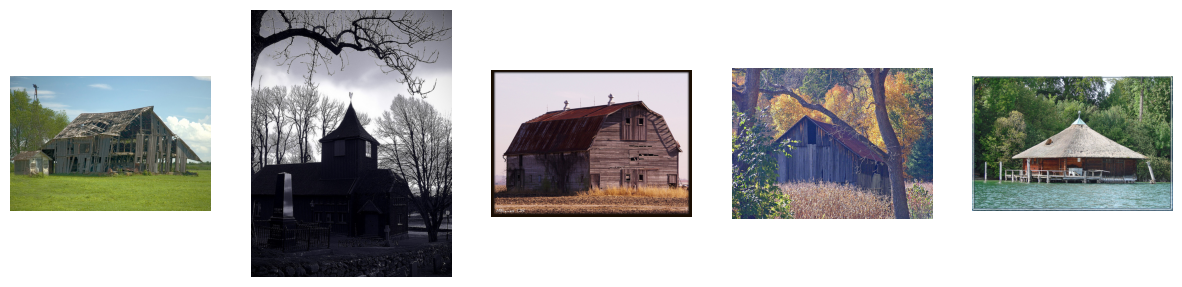

In [ ]:
import matplotlib.pyplot as plt

def display_similar_images(image_paths):
    num_images = len(image_paths)
    plt.figure(figsize=(15, 5))
    for i, img_path in enumerate(image_paths):
        img = Image.open(img_path)
        plt.subplot(1, num_images, i+1)
        plt.imshow(img)
        plt.axis('off')
    plt.show()

# Display the similar images
display_similar_images(similar_images)

In [ ]:
# # User input image path
# user_image_path = '/content/house3.jpg'  # Replace with actual path

# # Preprocess the user image
# user_image = preprocess_image(user_image_path)
# user_image = np.expand_dims(user_image, axis=0)

In [ ]:
# # Extract feature vector
# user_feature = base_model.predict(user_image)[0]

# # Apply PCA transformation
# user_feature_reduced = pca.transform([user_feature])[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


In [ ]:
# from scipy.spatial.distance import euclidean

# cluster_centroids = kmeans.cluster_centers_
# distances = [euclidean(user_feature_reduced, centroid) for centroid in cluster_centroids]
# closest_cluster_id = np.argmin(distances)
# print(f"User image assigned to cluster {closest_cluster_id} labeled '{cluster_labels[closest_cluster_id]}'")

User image assigned to cluster 19 labeled 'n02825657'


In [ ]:
# # Search for the top 5 nearest neighbors
# num_neighbors = 5
# nearest_indices = annoy_index.get_nns_by_vector(user_feature_reduced, num_neighbors, include_distances=False)

# # Get the image paths for the nearest neighbors
# similar_images = [image_files[idx] for idx in nearest_indices]

In [ ]:
import os
import shutil

# Define the base directory for cluster folders
cluster_base_dir = './miniImageNet_clusters/'

# Create the base directory if it doesn't exist
if not os.path.exists(cluster_base_dir):
    os.makedirs(cluster_base_dir)

# Create subdirectories for each cluster
for cluster_id in cluster_dict.keys():
    label = cluster_labels[cluster_id]
    label = ''.join(e for e in label if e.isalnum() or e in (' ', '_')).strip()
    cluster_dir = os.path.join(cluster_base_dir, f'{cluster_id}_{label}')
    if not os.path.exists(cluster_dir):
        os.makedirs(cluster_dir)

In [ ]:
for cluster_id, img_paths in cluster_dict.items():
    label = cluster_labels[cluster_id]
    label = ''.join(e for e in label if e.isalnum() or e in (' ', '_')).strip()
    cluster_dir = os.path.join(cluster_base_dir, f'{cluster_id}_{label}')
    for img_path in img_paths:
        shutil.copy(img_path, cluster_dir)